In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')
from jsm_massfunc import CSMF, cumulative, CSMF_old, H2H_CSMF
from jsm_datareduc import prep_data
import galhalo
import anaclass


### first just a single realization! see how it changes with a change in slope

In [54]:
massmat = anaclass.MassMat("../../data/3000_12_8/acc_surv_mass.npy")
massmat.prep_data()

In [55]:
index = 1232
lgMh = massmat.lgMh[index]
lgMs = galhalo.lgMs_D22_det(lgMh)
mass_bins = np.linspace(3,9,45)
CSMF_counts = cumulative(lgMs, mass_bins)

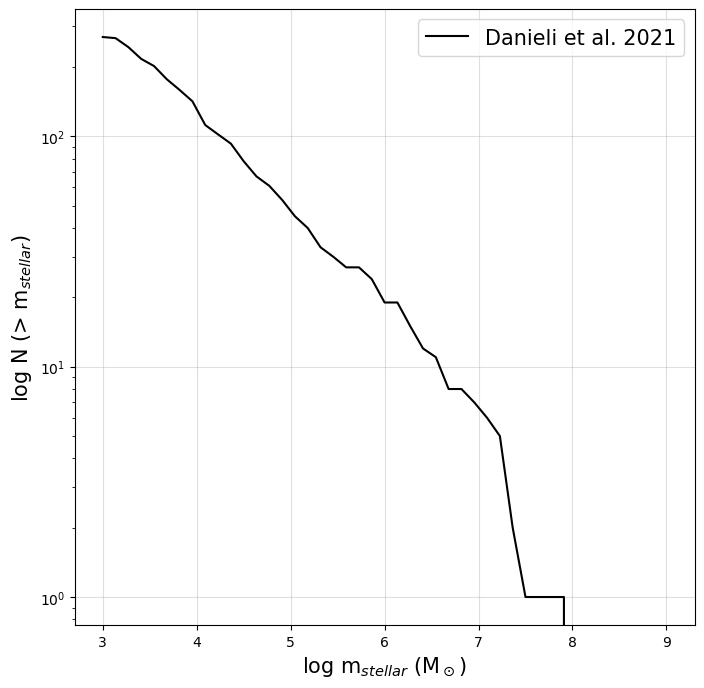

In [56]:
plt.figure(figsize=(8, 8))
plt.plot(mass_bins, CSMF_counts, color="black", label="Danieli et al. 2021")
plt.yscale("log")
plt.grid(alpha=0.4)
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.legend(fontsize=15)
plt.show()

### now seeing what happens if you change the slope of the SHMR

In [57]:
alpha_pix = 25
alpha = np.linspace(1.5, 3, alpha_pix)
mat = np.zeros(shape=(alpha_pix, 45))

In [58]:
for i,val in enumerate(alpha):
    lgMs = galhalo.lgMs_M23_det(lgMh,a=val)
    mat[i] = cumulative(lgMs, mass_bins)

In [59]:
halo_masses = np.linspace(7,12,100)

B13_star = galhalo.lgMs_B13(halo_masses)
RP17_star = galhalo.lgMs_RP17(halo_masses)


/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:194: RuntimeWarning: overflow encountered in exp
  return delta*(np.log10(1.+np.exp(x)))**gamma/(1.+np.exp(10**(-x)))-\
/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:248: RuntimeWarning: overflow encountered in exp
  return delta*(np.log10(1.+np.exp(x)))**gamma/(1.+np.exp(10**(-x)))-\


In [60]:
B13_c = cumulative(galhalo.lgMs_B13(lgMh), mass_bins)

RP17_c = cumulative(galhalo.lgMs_RP17(lgMh), mass_bins)

In [61]:
norm = mpl.colors.Normalize(vmin=alpha.min(), vmax=alpha.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis)

colors = mpl.cm.viridis(np.linspace(0, 1, alpha_pix))

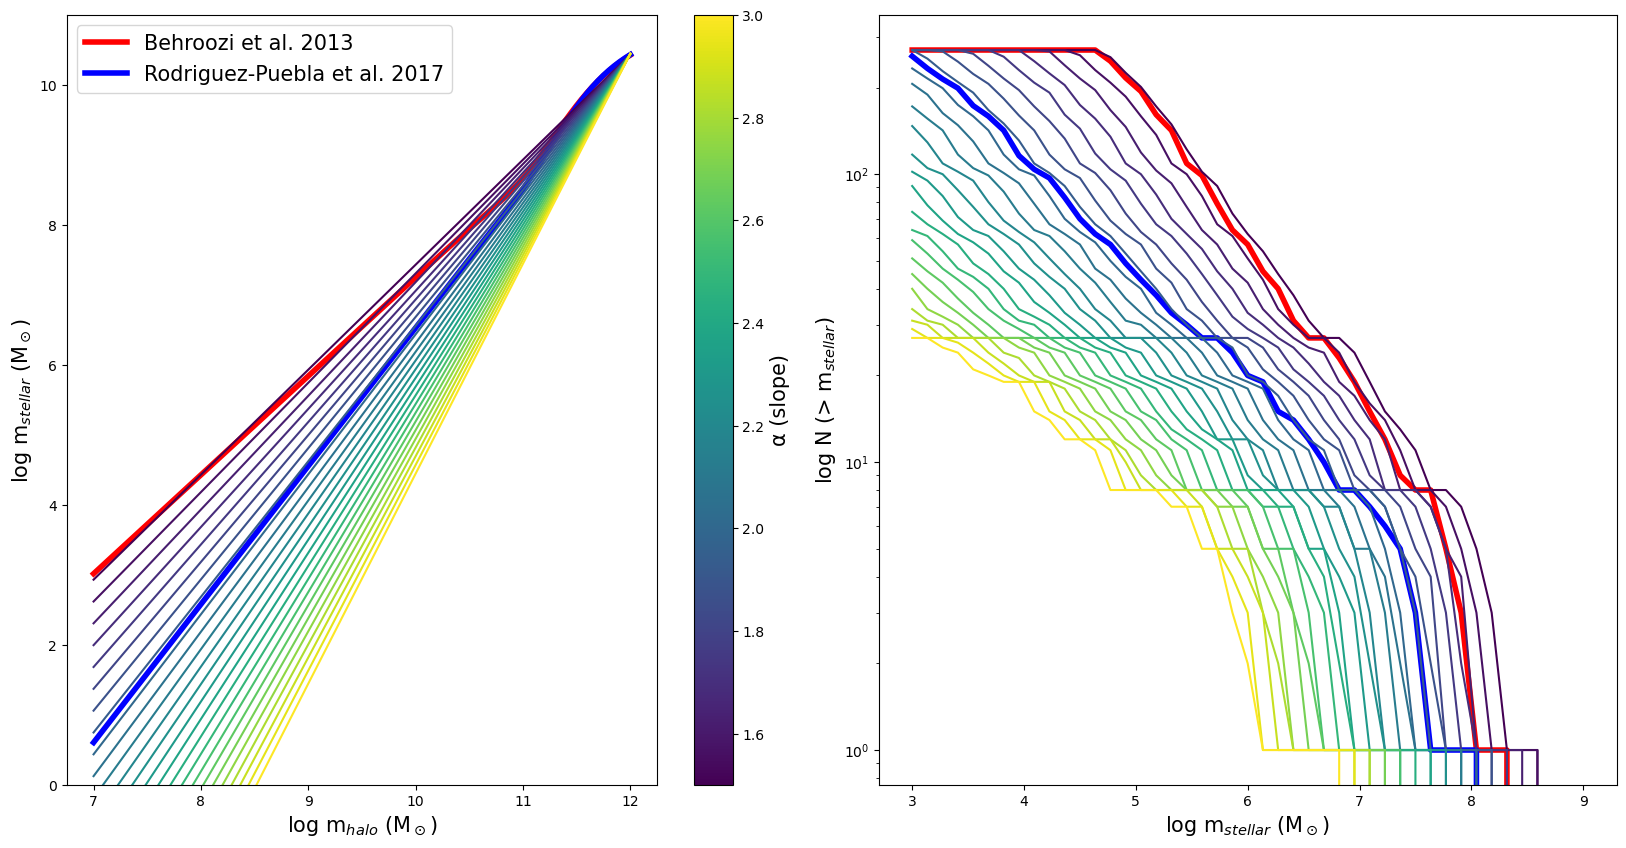

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(20,10), sharey=False)

axs[1].plot(mass_bins, B13_c, lw=4, color="red")
axs[1].plot(mass_bins, RP17_c, lw=4, color="blue")

axs[0].plot(halo_masses, B13_star, lw=4, label="Behroozi et al. 2013", color="red")
axs[0].plot(halo_masses, RP17_star, lw=4, label="Rodriguez-Puebla et al. 2017", color="blue")


for i in range(alpha_pix):
    axs[0].plot(halo_masses, galhalo.lgMs_M23_det(halo_masses, a=alpha[i], norm=None), color=colors[i])
    axs[1].plot(mass_bins, mat[i], color=colors[i])
    
axs[0].set_ylabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
axs[0].set_xlabel("log m$_{halo}$ (M$_\odot$)", fontsize=15)
axs[0].set_ylim(0,11)
axs[0].legend(fontsize=15)


cb = fig.colorbar(cmap, ax=axs[0])
cb.set_label(label='α (slope)', fontsize=15)

axs[1].set_yscale("log")
axs[1].set_xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
axs[1].set_ylabel("log N (> m$_{stellar}$)", fontsize=15)
#axs[1].set_yscale("log")
#axs[1].set_ylim(10**0, 10**2.3)
plt.subplots_adjust(wspace=0.1)
plt.show()

In [47]:
test = np.load("../../data/3000_12_8/acc_surv_mass.npy")

np.save("../../data/3000_12_8/acc_surv_mass_short.npy", test[0:150])

In [48]:
massmat = anaclass.MassMat("../../data/3000_12_8/acc_surv_mass_short.npy")
massmat.prep_data()

massmat.lgMh = massmat.lgMh[0:100]

massmat.CSMF()

massmat.quant

array([[208.  , 200.45, 182.45, 162.45, 141.45, 120.  , 105.45,  89.  ,
         75.  ,  64.  ,  54.  ,  44.  ,  35.45,  29.  ,  25.  ,  18.45,
         16.  ,  13.  ,  10.  ,   8.  ,   7.  ,   5.  ,   4.  ,   3.  ,
          2.  ,   2.  ,   1.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [245.  , 237.5 , 216.  , 191.  , 167.  , 145.  , 123.  , 107.  ,
         92.  ,  78.  ,  66.  ,  56.  ,  47.  ,  39.  ,  33.  ,  28.  ,
         23.  ,  19.  ,  16.  ,  13.5 ,  11.  ,   9.  ,   7.  ,   6.  ,
          5.  ,   4.  ,   3.  ,   3.  ,   2.  ,   2.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [278.  , 270.  , 244.  , 219.  , 195.55, 171.55, 146.55, 126.55,
        108.55,  94.  ,  79.  ,  71.  ,  60.  ,  50.  ,  43.  ,  36.55,
         31.55,  27.55,  22.  ,  19.  

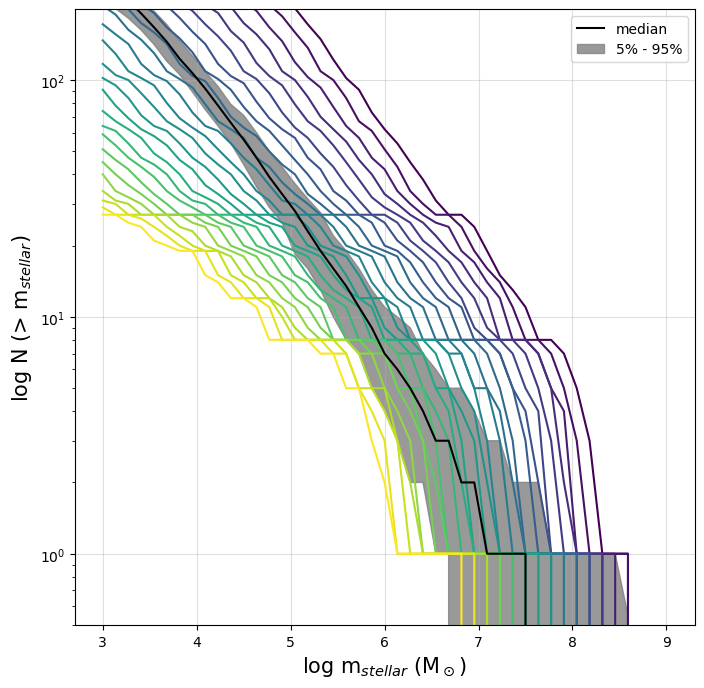

In [49]:
plt.figure(figsize=(8,8))

for i in range(alpha_pix):
    plt.plot(mass_bins, mat[i], color=colors[i])

plt.plot(mass_bins, massmat.quant[1], label="median", color="black")
plt.fill_between(mass_bins, y1=massmat.quant[0], y2=massmat.quant[2], alpha=0.8, color="grey", label="5% - 95%")
plt.grid(alpha=0.4)
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.yscale("log")
plt.ylim(0.5, 10**2.3)
plt.legend()
plt.show()

In [50]:
massmat = anaclass.MassMat("../../data/evo/acc_surv_mass.npy", phimin=-4, lgMsmin=3, lgMsmax=10) # plotting several different mass functions

massmat.prep_data()

massmat.CSMF()

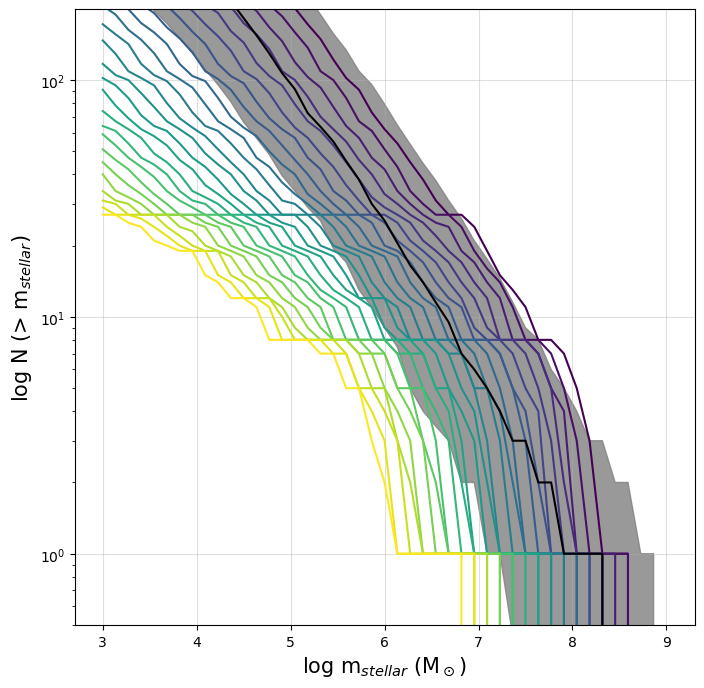

In [51]:
plt.figure(figsize=(8,8))

for i in range(alpha_pix):
    plt.plot(mass_bins, mat[i], color=colors[i])

plt.plot(mass_bins, massmat.quant[1], label="median", color="black")
plt.fill_between(mass_bins, y1=massmat.quant[0], y2=massmat.quant[2], alpha=0.8, color="grey", label="5% - 95%")
plt.grid(alpha=0.4)
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.yscale("log")
plt.ylim(0.5, 10**2.3)
plt.show()